Load the wigxjpf library and set the MAXSPIN we want to reach in our computations

In [1]:
import pywigxjpf as wig
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,7.5)

In [2]:
MAXSPIN = 500

Precompute the {6j} symbols. Notice that to ask for spin j you need to use 2*j, in this way they deal with half integers

In [3]:
wig.wig_table_init(2*MAXSPIN,6)
wig.wig_temp_init(2*MAXSPIN)

In [4]:
jj1,jj2,jj3,jj4,jj5,jj6= 1,1,1,1,1,1

In [5]:
l=np.arange(2,MAXSPIN,2)
symbol = lambda el : wig.wig6jj(el*jj1,el*jj2,el*jj3, el*jj4,el*jj5,el*jj6)
y= np.array(list(map(symbol,l)))


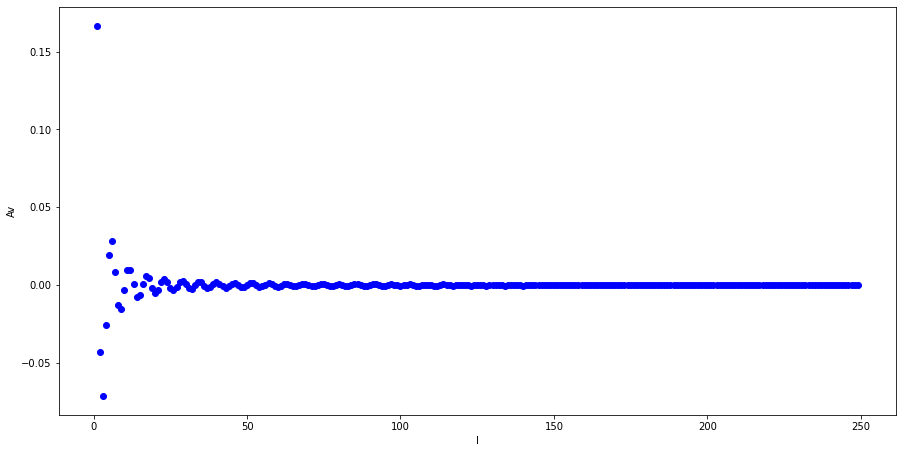

In [6]:
plt.xlabel("l")
plt.ylabel("Av")
plt.plot(l/2, y, 'o', color='blue')
plt.savefig("plot1.svg")
plt.show()



Volume of the tetrahedron of lengths 2jj1 , 2jj2 ,2jj3, 2jj4, 2jj5, 2jj6 . This is the origin of the factor 8.

In [7]:
def tet_volume(jj1,jj2,jj3,jj4,jj5,jj6):
    return 1/8 * 1/12*np.sqrt(-jj1**2 *jj2**2 *jj4**2 + jj1**2 *jj3**2 *jj4**2 + jj2**2 *jj3**2 *jj4**2 - jj3**4 *jj4**2 - jj3**2 *jj4**4 + jj1**2 *jj2**2 *jj5**2 - jj2**4 *jj5**2 - jj1**2*jj3**2*jj5**2 + jj2**2*jj3**2*jj5**2 + jj2**2*jj4**2*jj5**2 + jj3**2*jj4**2*jj5**2 - jj2**2*jj5**4 - jj1**4*jj6**2 + jj1**2*jj2**2*jj6**2 + jj1**2*jj3**2*jj6**2 - jj2**2*jj3**2*jj6**2 + jj1**2*jj4**2*jj6**2 + jj3**2*jj4**2*jj6**2 + jj1**2*jj5**2*jj6**2 + jj2**2*jj5**2*jj6**2 - jj4**2*jj5**2*jj6**2 - jj1**2*jj6**4)


In [8]:
rescaled_symbol = lambda el : np.sqrt(12*np.pi*tet_volume(el*jj1,el*jj2,el*jj3, el*jj4,el*jj5,el*jj6))* wig.wig6jj(el*jj1,el*jj2,el*jj3, el*jj4,el*jj5,el*jj6)
yrescaled= np.array(list(map(rescaled_symbol,l)))

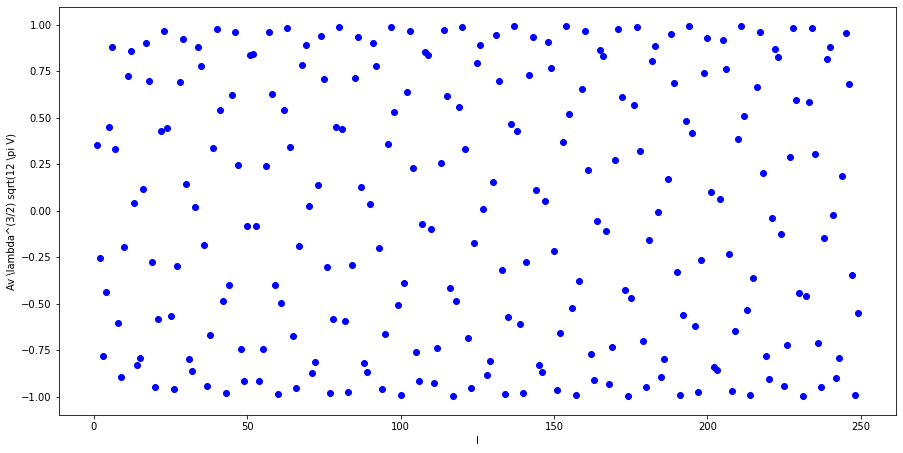

<Figure size 1080x540 with 0 Axes>

In [9]:
plt.xlabel("l")
plt.ylabel("Av \lambda^(3/2) sqrt(12 \pi V)")
plt.plot(l/2, yrescaled, 'o', color='blue')
plt.savefig("plot2.svg")
plt.show()

In [10]:
def Sr(l):
    th= np.arccos(-1/3)
    return 6 *(l+1/2) *th

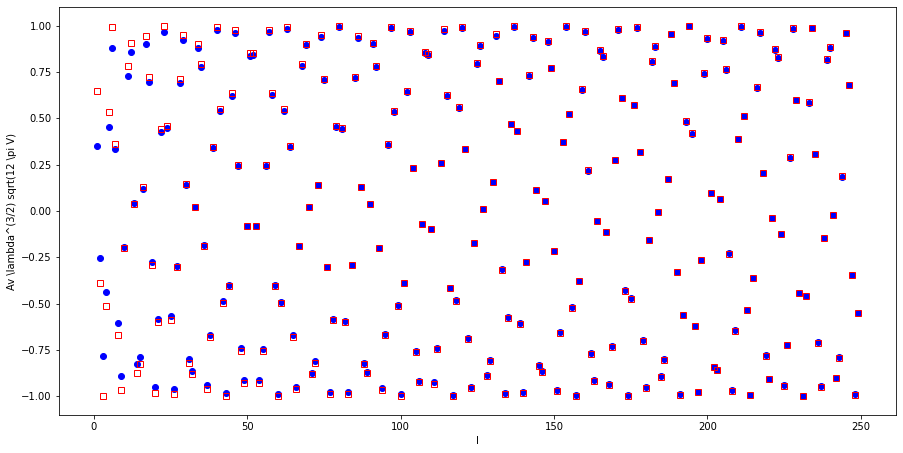

<Figure size 1080x540 with 0 Axes>

In [11]:
plt.xlabel("l")
plt.ylabel("Av \lambda^(3/2) sqrt(12 \pi V)")
plt.plot(l/2, yrescaled, 'o', color='blue')
plt.plot(l/2, np.cos(Sr(l/2) + np.pi /4), 'ks',color='red',markerfacecolor='none')
plt.savefig("plot3.svg")
plt.show()